In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import geopandas

import warnings
warnings.filterwarnings("ignore") # additional


In [2]:
# Load datasets
tokio_medals_dataset = pd.read_excel("Medals.xlsx")
tokio_athletes_dataset = pd.read_excel("Athletes.xlsx")
tokio_coaches_dataset = pd.read_excel("Coaches.xlsx")
tokio_gender_dataset = pd.read_excel("EntriesGender.xlsx")
tokio_teams_dataset = pd.read_excel("Teams.xlsx")
print(tokio_medals_dataset.isna().sum())
print()
print(tokio_athletes_dataset.isna().sum())
print()
print(tokio_coaches_dataset.isna().sum())
print()
print(tokio_teams_dataset.isna().sum())
print()
print(tokio_gender_dataset.isna().sum())
print()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

Name          0
NOC           0
Discipline    0
dtype: int64

Name            0
NOC             0
Discipline      0
Event         145
dtype: int64

Name          0
Discipline    0
NOC           0
Event         0
dtype: int64

Discipline    0
Female        0
Male          0
Total         0
dtype: int64



#                        Analysis of Athletes informations in Tokyo 2021

## Top 10 countries with more athletes:

<AxesSubplot:xlabel='Nationality', ylabel='Quantity'>

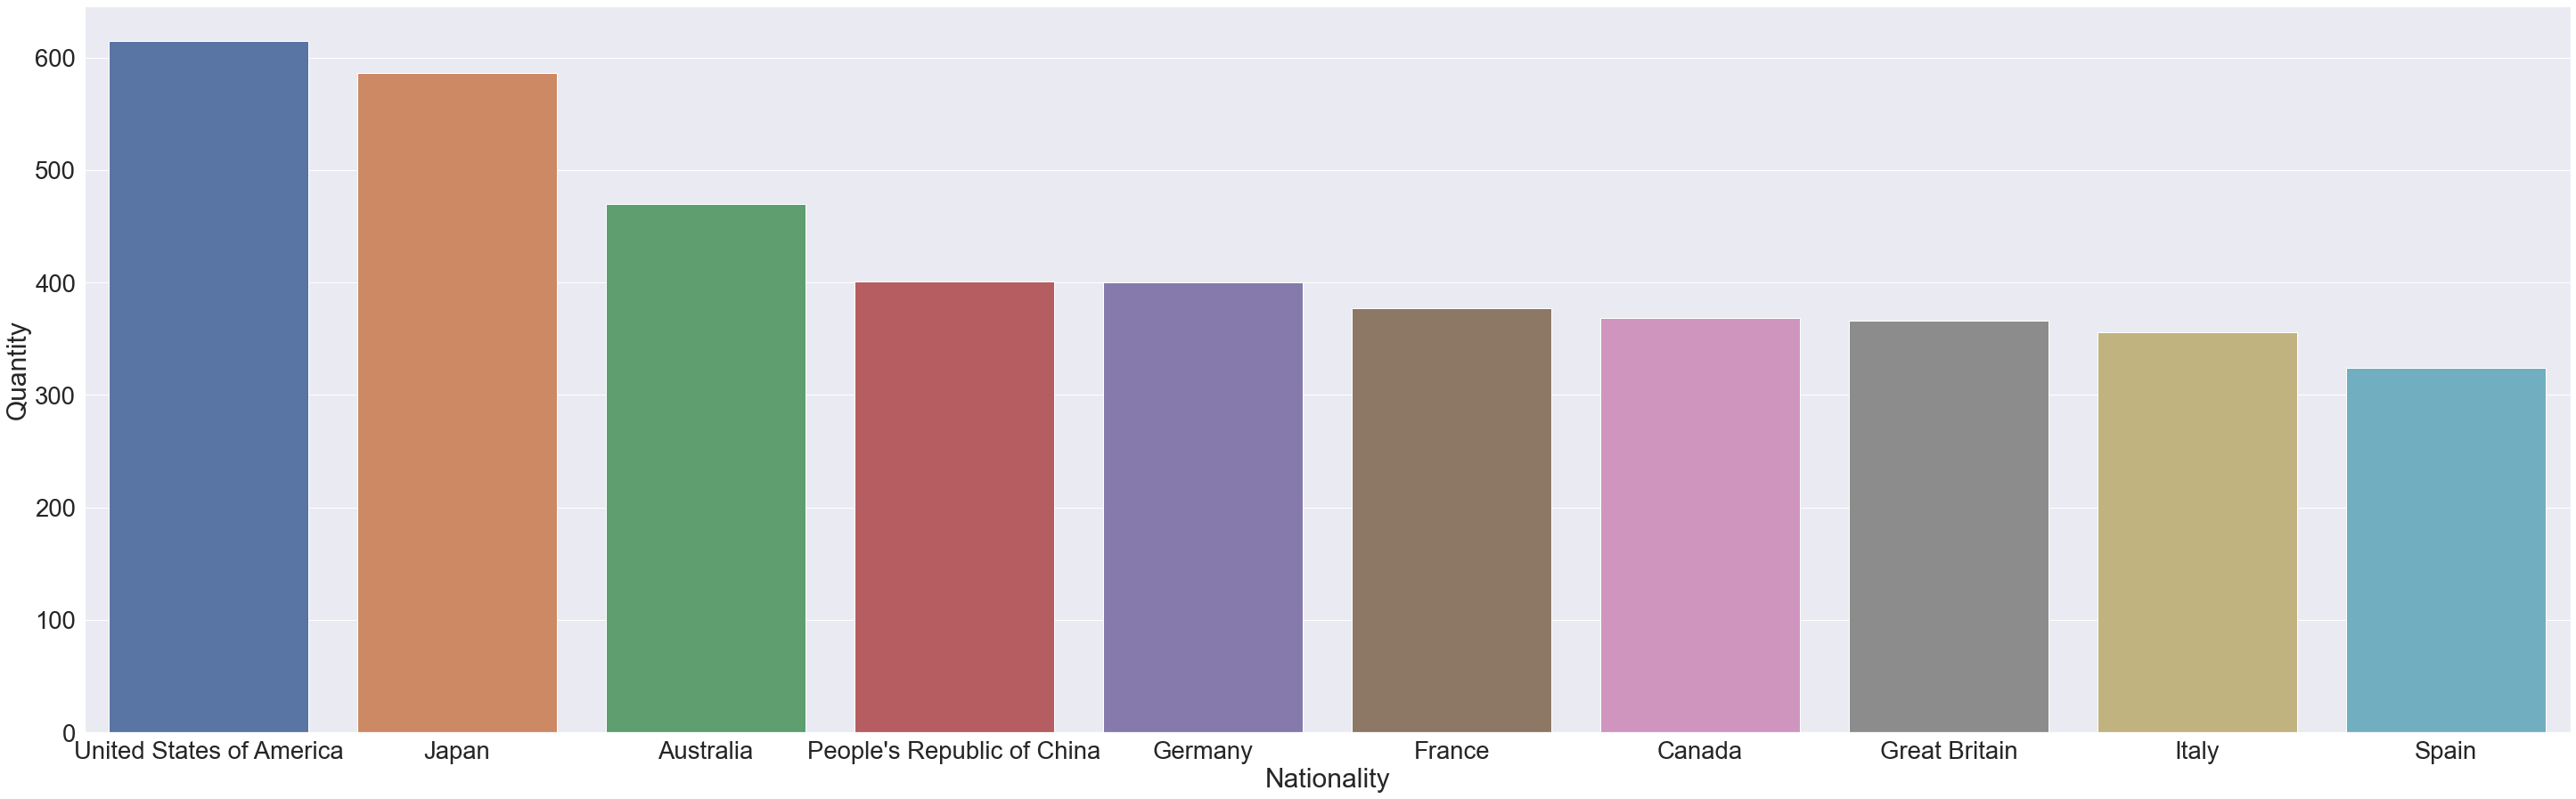

In [3]:
athletes_count = tokio_athletes_dataset.NOC.value_counts()
athletes_count_df = athletes_count.to_frame().reset_index()
athletes_count_df.rename(columns={"index": "Nationality", "NOC": "Quantity"}, inplace = True)
ten_most_athletes_countries = athletes_count_df[:10]
ten_most_athletes_countries.head()
plt.figure(figsize=(50,15))
sns.set(font_scale = 2.5)
sns.barplot(x = "Nationality", y = "Quantity", data = ten_most_athletes_countries)

# Countries from South America with more athletes:

<AxesSubplot:>

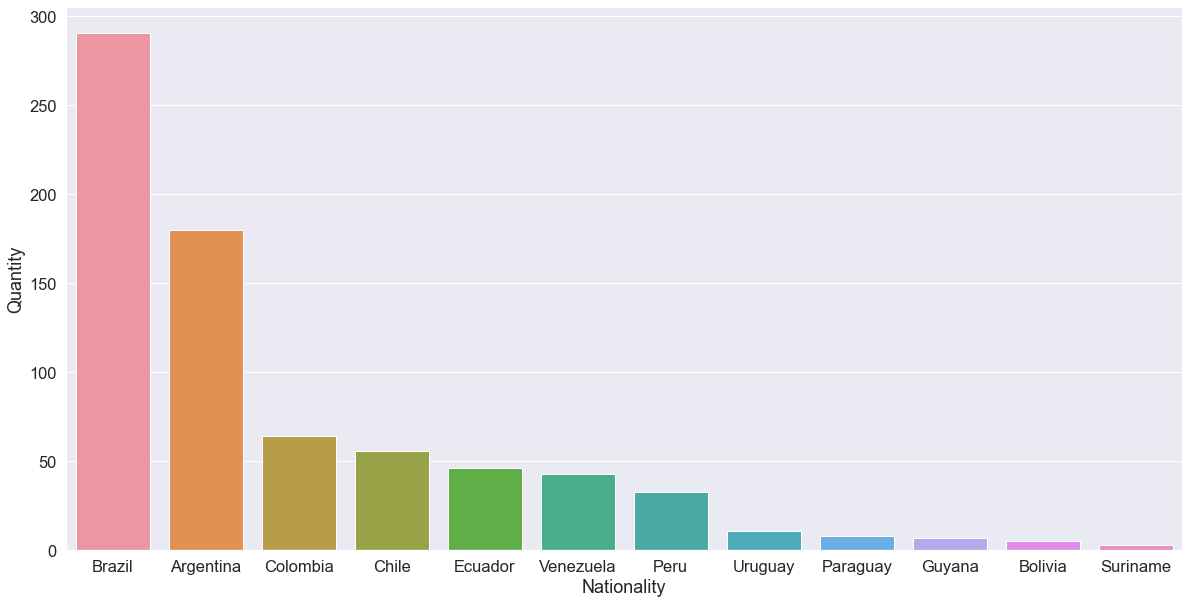

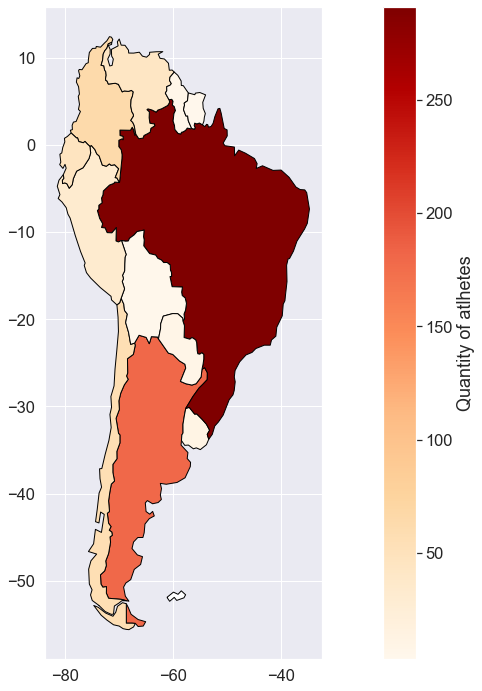

In [4]:
latam_countries = ['Chile', 'Argentina', 'Brazil', 'Peru', 'Uruguay', 'Colombia', 'Paraguay',
                    'Bolivia', 'Venezuela', 'Ecuador', 'Guyana', 'Suriname']
latam_athletes_count_df = athletes_count_df.copy()
latam_athletes_count_df = latam_athletes_count_df[latam_athletes_count_df["Nationality"].isin(latam_countries)]
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5)
sns.barplot(x = "Nationality", y = "Quantity", data = latam_athletes_count_df)
print()

#Load map
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

#Restrict to south america:
south_america_map = world[world.continent == 'South America']
athletes_country_final = south_america_map.merge(latam_athletes_count_df, how = 'left', left_on=['name'], right_on=['Nationality'])

athletes_country_final.plot(column = "Quantity",
                           figsize=(22,12),
                           legend=True,
                           edgecolor="black",
                           legend_kwds={"label":"Quantity of atlhetes"},
                           cmap='OrRd',
                           missing_kwds={"color":"white"}
                          )

## Countries with less athletes in Tokio 2021:

In [5]:
athletes_count_df.describe()
countries_with_least_atheletes = athletes_count_df[189:]
plt.figure(figsize=(50,12))
sns.set(font_scale = 1.5)
sns.barplot(x = "Nationality", y = "Quantity of athlets", data = countries_with_least_atheletes)

ValueError: Could not interpret input 'Quantity of athlets'

<Figure size 3600x864 with 0 Axes>

## Discipline with most athletes in Tokio 2021:

In [ ]:
discipline_count = tokio_athletes_dataset.Discipline.value_counts()
discipline_count_df = discipline_count.to_frame().reset_index()
discipline_count_df.rename(columns = {"index" : "Discipline", "Discipline" : "Quantity"}, inplace = True)
discipline_with_most_athletes = discipline_count_df[:1]
discipline_with_most_athletes

## Discipline with less atheletes in Tokio 2021:

In [ ]:
discipline_count_df.tail()
discipline_with_least_athletes = discipline_count_df[45:]
discipline_with_least_athletes

## Apellidos mas repetidos entre atletas:

In [ ]:
test_name_df= tokio_athletes_dataset.copy()
test_name_df[["last_name", "a", "b","c"]] = test_name_df.Name.str.split(" [A-Z][a-z]+", expand=True)
tokio_atlhletes_with_last_names = test_name_df.drop(columns = ["b", "a", "c"])
repeated_last_names_count = tokio_atlhletes_with_last_names.groupby('last_name')['NOC'].count().sort_values(ascending=False).head(10)
repeated_last_names_df = repeated_last_names_count.to_frame().reset_index()
repeated_last_names_df.rename(columns = {"NOC":"Quantity"}, inplace = True)
plt.figure(figsize=(20,12))
sns.set(font_scale = 1.5)
sns.barplot(data = repeated_last_names_df, x = "last_name", y = "Quantity")
plt.xlabel('Last Name')
plt.ylabel('Quantity of person with the same last name')

#                          Analysis of Teams informations in Tokyo 2021

# How many teams participate in each Olympic game?

In [ ]:
#num_of_temas_by_discipline = tokio_teams_dataset.groupby("Event")["NOC"].value_counts().to_frame()
#num_of_temas_by_discipline = tokio_teams_dataset.groupby("Discipline").value_counts().to_frame()
#tokio_teams_dataset.head()
num_of_temas_by_discipline = tokio_teams_dataset["Discipline"].value_counts().to_frame().reset_index()
num_of_temas_by_discipline.rename(columns = {"index" : "Discipline", "Discipline" : "Quantity of teams"}, inplace = True)
plt.figure(figsize=(40,10))
sns.set(font_scale = 1.1)
sns.barplot(data = num_of_temas_by_discipline, x = "Discipline", y = "Quantity of teams")

# Teams per gender

         Discipline  Quantity_of_mens_teams  Quantity_of_womens_teams
0  Beach Volleyball                      24                        24
1          Football                      16                        12
2            Hockey                      12                        12
3        Water Polo                      12                        10
4      Rugby Sevens                      12                        12
5        Basketball                      12                        12
6        Volleyball                      12                        12
7          Handball                      12                        12
8    3x3 Basketball                       8                         8

          Discipline                      cols  vals
0   Beach Volleyball    Quantity_of_mens_teams    24
1           Football    Quantity_of_mens_teams    16
2             Hockey    Quantity_of_mens_teams    12
3         Water Polo    Quantity_of_mens_teams    12
4       Rugby Sevens    Quantity_o

<AxesSubplot:xlabel='Discipline', ylabel='vals'>

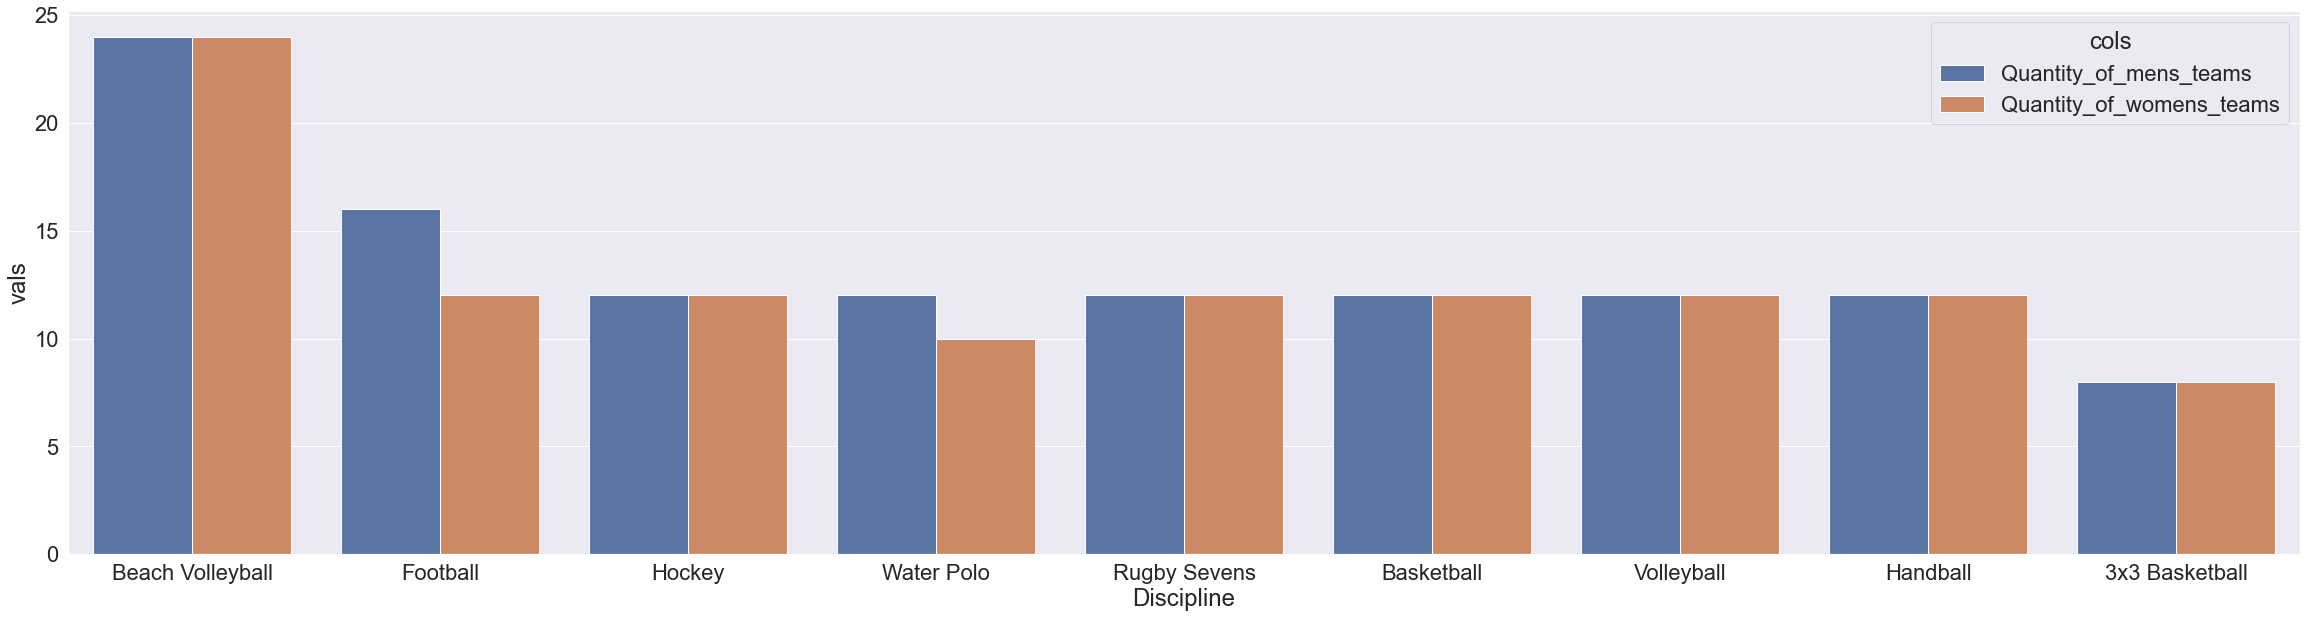

In [10]:
only_men_events = tokio_teams_dataset[tokio_teams_dataset["Event"] == "Men"]
only_woman_events = tokio_teams_dataset[tokio_teams_dataset["Event"] == "Women"]
num_of_only_woman_events_teams = only_woman_events["Discipline"].value_counts().to_frame().reset_index()
num_of_only_men_events_teams = only_men_events["Discipline"].value_counts().to_frame().reset_index()
num_of_events_both_gender = pd.merge(left = num_of_only_men_events_teams, 
                                     right = num_of_only_woman_events_teams,
                                     how ="left" , left_on = "index",
                                     right_on ="index")

num_of_events_both_gender.rename(columns = {"index" : "Discipline",
                                         "Discipline_x" : "Quantity_of_mens_teams",
                                         "Discipline_y" : "Quantity_of_womens_teams"}, inplace = True)

print(num_of_events_both_gender)
print()
melted_df = num_of_events_both_gender.melt('Discipline', var_name='cols',  value_name='vals')
print(melted_df.head(30))
plt.figure(figsize=(40,10))
sns.set(font_scale = 2)
sns.barplot(x = "Discipline", y = "vals", hue = "cols",
            data = melted_df)

# Analysis of Coaches informations in Tokyo 2021

In [89]:
# First we take a look to the dataset.
print(tokio_coaches_dataset.describe())
print()
# Get NaN values
print(tokio_coaches_dataset.isna())
# There are multiple NaN in Event column, so a lot of coachs aren't related to a event.

num_of_na = tokio_coaches_dataset.Event.isna().sum()
print(f"Coaches has {num_of_na} events not listed")


            Name    NOC  Discipline Event
count        394    394         394   249
unique       381     61           9     6
top     WANG Jie  Japan  Basketball   Men
freq           2     35          74    94

      Name    NOC  Discipline  Event
0    False  False       False   True
1    False  False       False   True
2    False  False       False   True
3    False  False       False   True
4    False  False       False   True
..     ...    ...         ...    ...
389  False  False       False   True
390  False  False       False  False
391  False  False       False   True
392  False  False       False   True
393  False  False       False  False

[394 rows x 4 columns]
Coaches has 145 event not listed


## Country with most numbers of coaches

<AxesSubplot:>

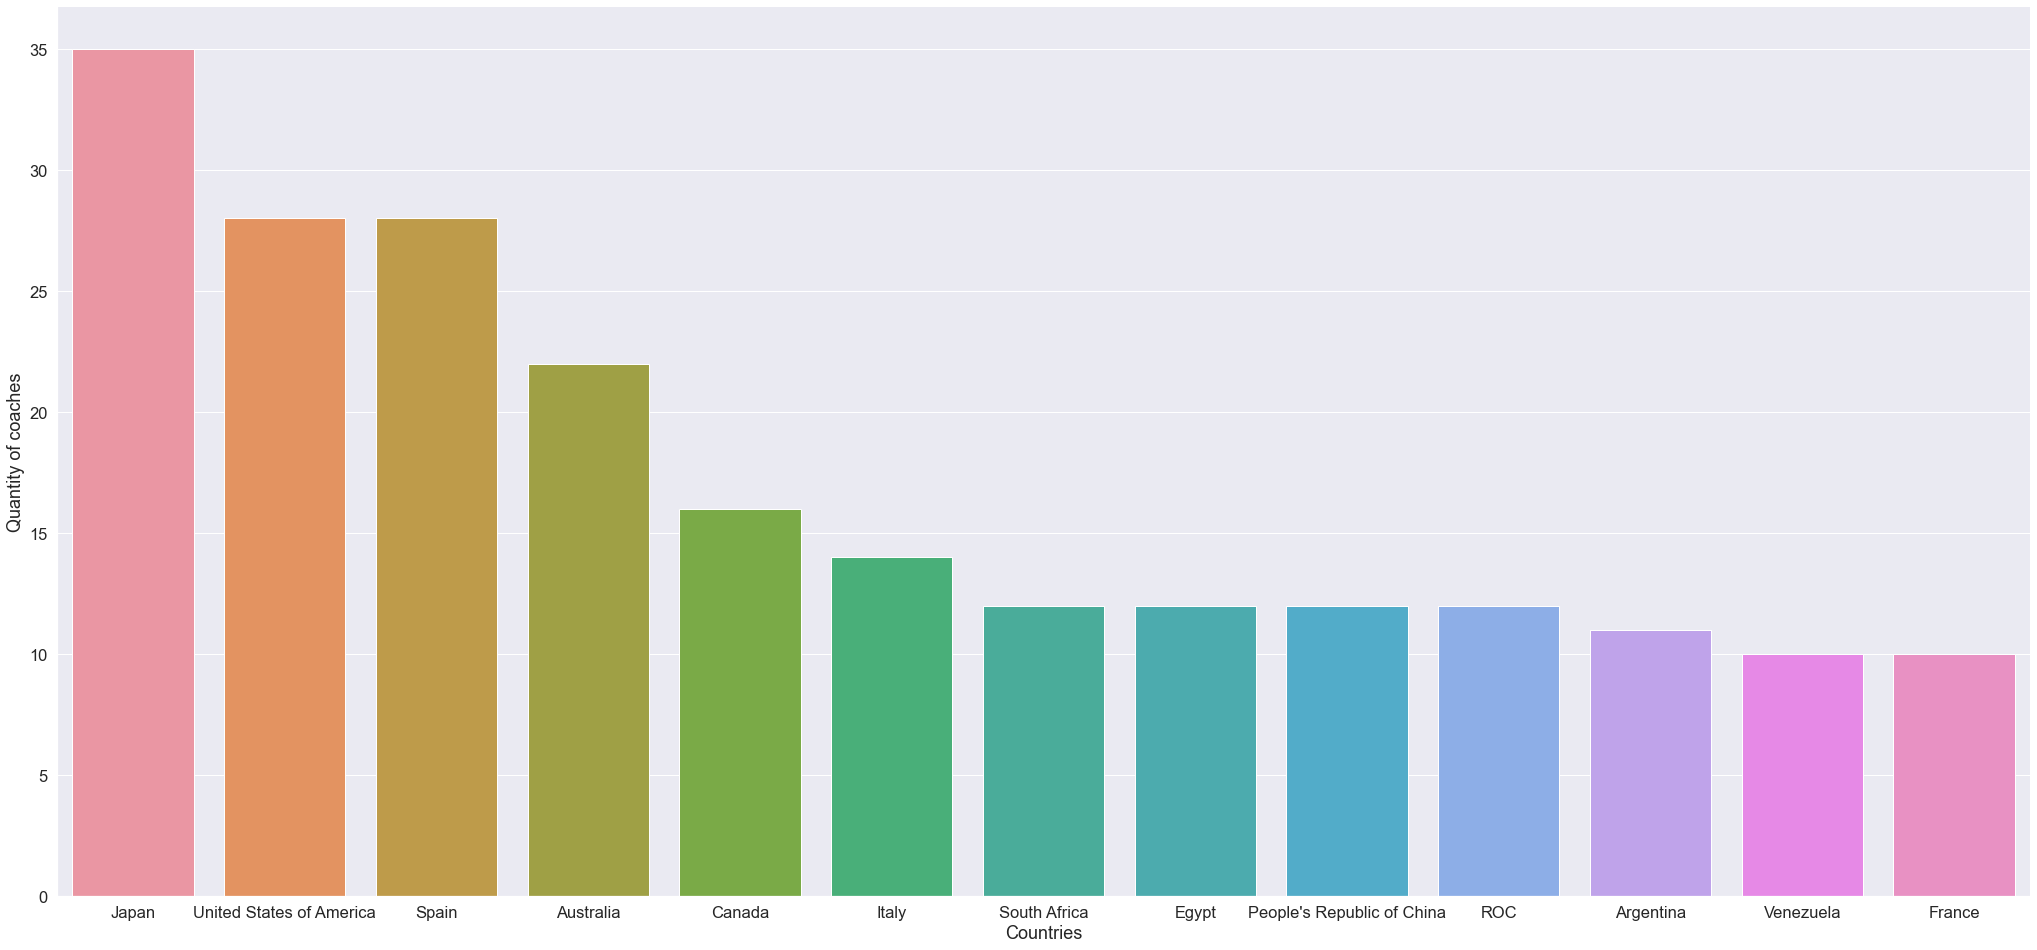

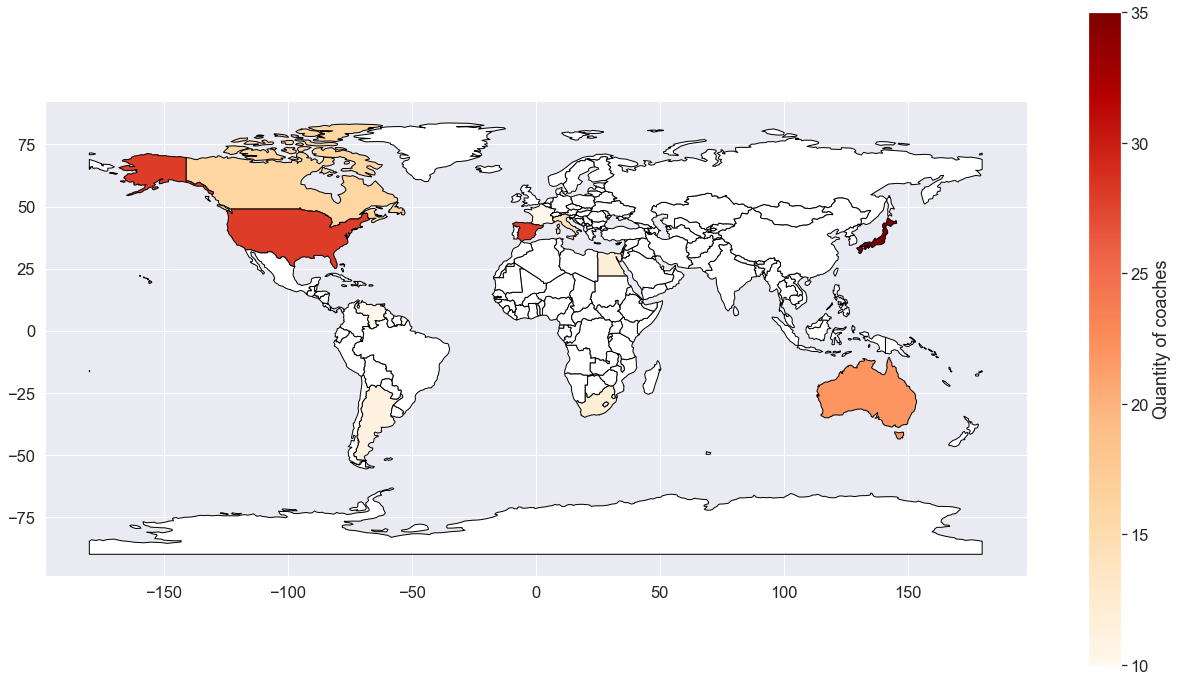

In [114]:
num_of_coaches_per_country = tokio_coaches_dataset["NOC"].value_counts().to_frame().reset_index()[:13]
num_of_coaches_per_country.rename(columns = {"index" : "Countries", "NOC" : "Quantity of coaches"}, inplace = True)
sns.set(font_scale = 1.5)
g = sns.catplot(data=num_of_coaches_per_country, kind="bar", x="Countries", y="Quantity of coaches")
g.fig.set_size_inches(40,15)
print()

world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

athletes_country_final = world.merge(num_of_coaches_per_country, how = 'left', left_on=['name'], right_on=['Countries'])

athletes_country_final.plot("Quantity of coaches",
                           figsize=(22,12),
                           legend=True,
                           edgecolor="black",
                           legend_kwds={"label":"Quantity of coaches"},
                           cmap='OrRd',
                           missing_kwds={"color":"white"}
                          )

## Coaches who coach multiple teams

In [94]:
# Because there are a lot a of NaN values in Event colum, we only need the coaches related to a existing event.
coaches_with_events = tokio_coaches_dataset.dropna() 
coaches_with_events = coaches_with_events.groupby("Name")["Event"].count().sort_values(ascending = False)
coaches_with_events_df = coaches_with_events.to_frame().reset_index()
coaches_with_events_df.rename(columns = {"Event": "Quantity"}, inplace = True)
coaches_with_events_df[coaches_with_events_df["Quantity"] > 1]

,Name,Quantity
0,CHERNETSKA Natalia,2
1,FARINELLI Roberta,2
2,CHEPAK Anastasiya,2
3,TARRES CAMPA Ana,2
4,ELAFANDI Nour,2
5,WANG Jie,2
6,GIALLOMBARDO Patrizia,2
7,MONTICO Loredana,2
8,SZAUDER Gabor,2
9,FUJIKI Mayuko,2


## Cantidad de mujeres y hombres con respecto a juegos clasicos en equipo e individuales.

<AxesSubplot:xlabel='Discipline', ylabel='Quantity'>

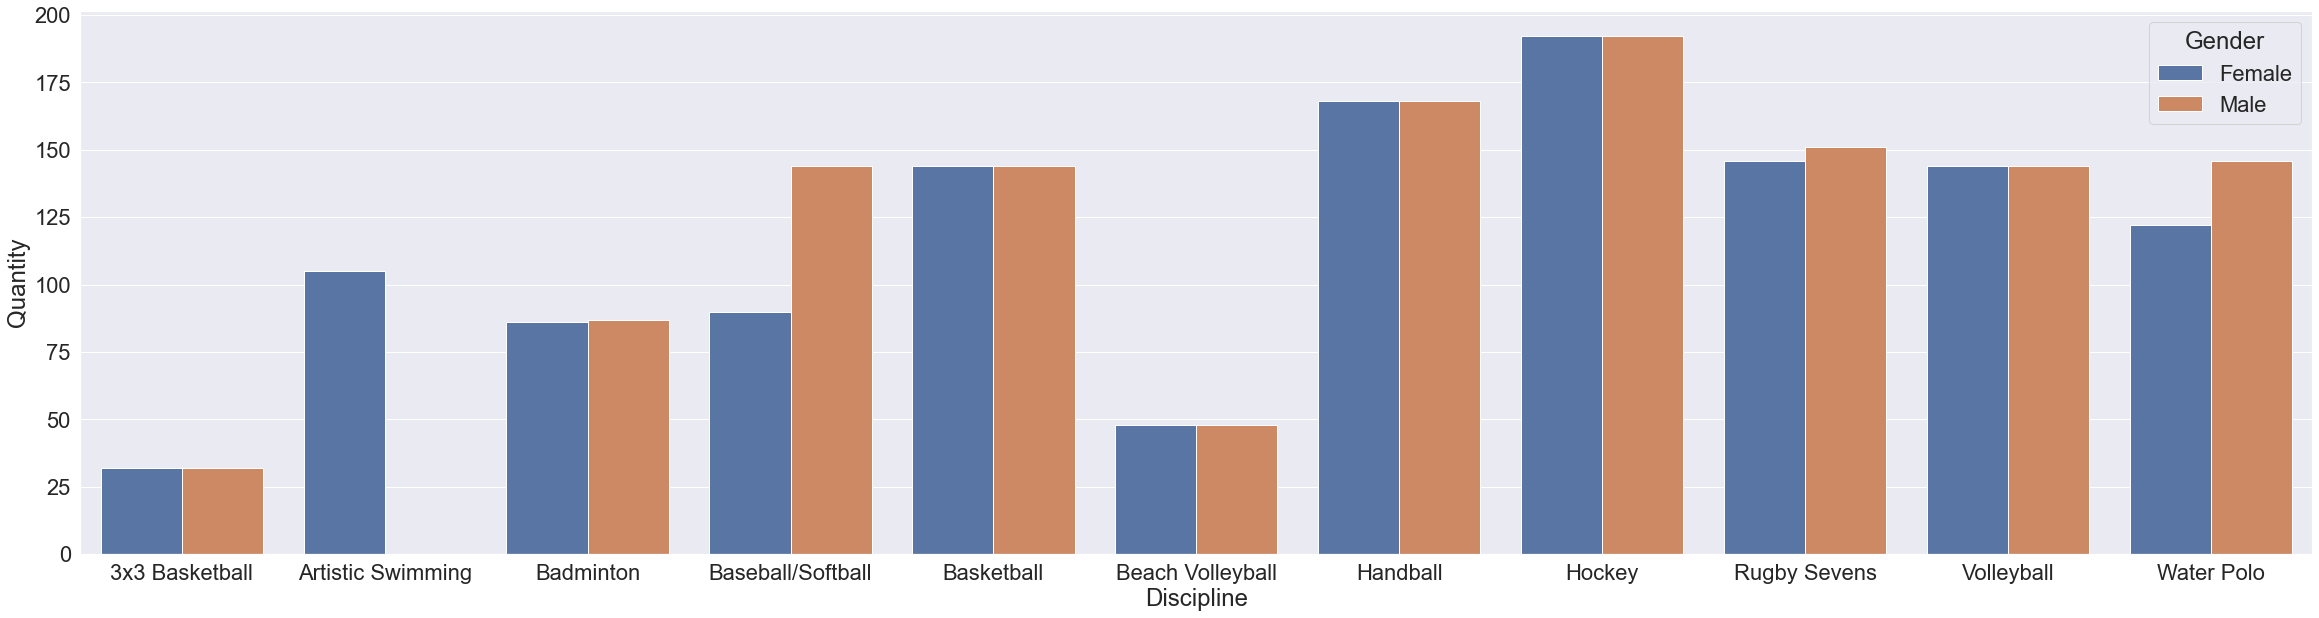

In [174]:
# Team based games
# La seleccion de los deportes en equipo la hago basandome en  si o no es razonablemente realizarlo sin companieros.
# Por ejemplo, handball o futbol, 1 v 1. No tiene sentido.
# Por otra parte, Si bien disciplinas como Tenis, Arqueria, se pueden practicar en equipo,
# Un encuentro 1 v 1 es igual de viable.


team_based_games = ['3x3 Basketball',
                   'Artistic Swimming', 'Badminton', 'Baseball/Softball',
                   'Basketball', 'Beach Volleyball', 'Handball', 'Hockey',
                   'Rugby Sevens','Volleyball', 'Water Polo']

individual_games =  ['Archery', 'Artistic Gymnastics', 'Athletics', 'Boxing',
                     'Canoe Slalom', 'Canoe Sprint', 'Cycling BMX Freestyle',
                     'Cycling BMX Racing', 'Cycling Mountain Bike', 'Cycling Road'
                     'Cycling Track', 'Diving', 'Equestrian', 'Fencing', 'Golf', 'Judo', 'Karate',
                     'Marathon Swimming', 'Modern Pentathlon', 'Rhythmic Gymnastics',
                     'Rowing', 'Sailing', 'Shooting', 'Skateboarding', 'Sport Climbing', 'Surfing'
                     'Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Trampoline Gymnastics', 
                     'Triathlon','Weightlifting', 'Wrestling']


gender_team_games_df = tokio_gender_dataset[tokio_gender_dataset["Discipline"].isin(team_based_games)]
gender_individual_games_df = tokio_gender_dataset[tokio_gender_dataset["Discipline"].isin(individual_games)]
gender_team_games_df.drop(columns = ["Total"], inplace = True)
gender_individual_games_df.drop(columns = ["Total"], inplace = True)
melted_team_games_df = gender_team_games_df.melt('Discipline', var_name='Gender',  value_name='Quantity')
plt.figure(figsize=(40,10))
sns.set(font_scale = 2)
sns.barplot(x = "Discipline", y = "Quantity", hue = "Gender",
            data = melted_team_games_df)
#gender_team_games_df

In [ ]:
# Podemos ver que Artistic Swimming, esta compuesta por unicamente por mujeres, y esto es por reglamento.
# Solo mujeres puede realizar ese deporte.

# Sacando esto de lado, y teniendo en cuenta nuestra seleccion de deportes. En el general de los deportes
# la diferencia de mujeres y hombres, no es notoria. Solo en Baseball/Softball, con 54 deportistas hombres mas.

<AxesSubplot:xlabel='Discipline', ylabel='Quantity'>

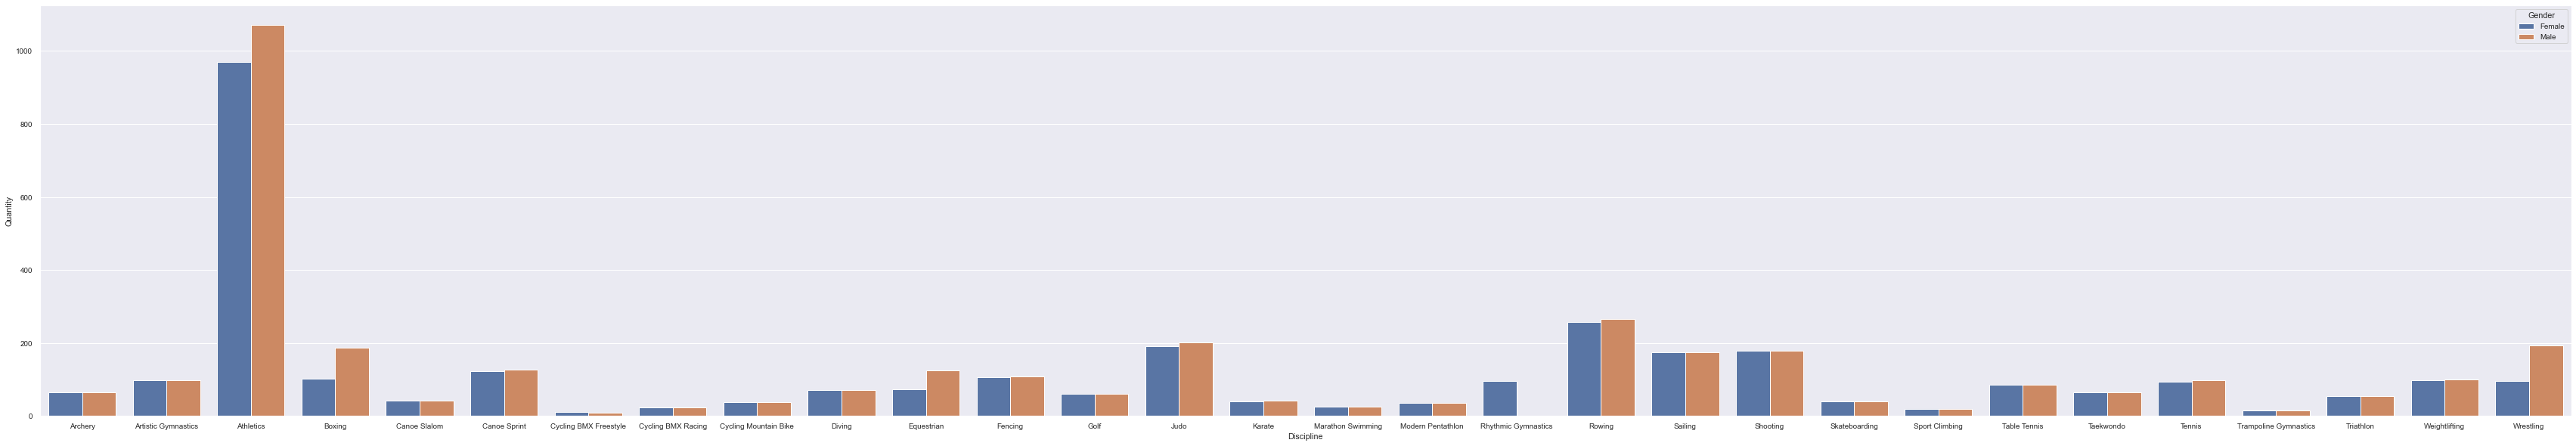

In [175]:
melted_individual_games_df = gender_individual_games_df.melt('Discipline', var_name='Gender',  value_name='Quantity')
plt.figure(figsize=(60,10))
sns.set(font_scale = 0.9)
sns.barplot(x = "Discipline", y = "Quantity", hue = "Gender",
            data = melted_individual_games_df)
#gender_individual_games_df

In [ ]:
# Como en el caso de Artistic Swimming en los deportes en grupo,
# Rhythmic Gymnastics tambien esta limitada solo a mujeres.
# En los unicos deportes que existe mas la presencia de hombres, de una manera notoria, es en atletismo, y Wrestling.